# SAB prediction

In [1]:
from warnings import simplefilter
simplefilter('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

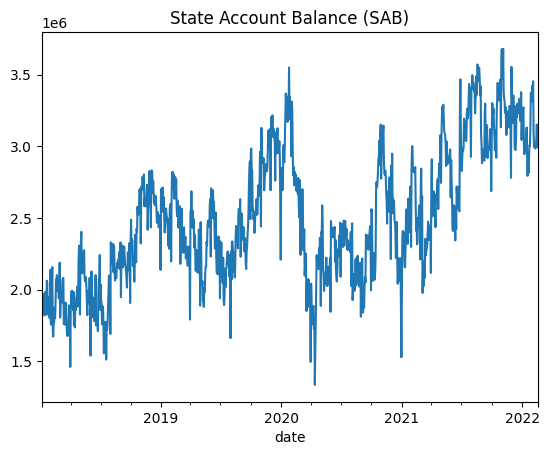

In [3]:
data = pd.read_excel('../data/SAB.xlsx', parse_dates=['date'], index_col='date')
data['SAB'].plot(title = 'State Account Balance (SAB)'); plt.show()

## Section 2: Model Definition

In [4]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import (
    StatsForecastAutoARIMA,
    StatsForecastAutoETS,
    StatsForecastAutoCES, 
    StatsForecastAutoTheta,
    StatsForecastMSTL,
    StatsForecastAutoTBATS,
)
from sktime.forecasting.fbprophet import Prophet

In [5]:
ForecastingModels = {
    "Naive": NaiveForecaster(),
    "Seasonal_Naive": NaiveForecaster(sp = 5),
    "AutoARIMA": StatsForecastAutoARIMA(
                    trend=True, seasonal=True,
                    max_D = 262, max_p= 10, max_q=10),
    "AutoETS": StatsForecastAutoETS(season_length=262),
    "AutoCES": StatsForecastAutoCES(season_length=262),
    "AutoTheta": StatsForecastAutoTheta(season_length=262),
    "AutoTBATS": StatsForecastAutoTBATS(seasonal_periods=262, 
                                        use_trend =True, use_boxcox=True),
    "LOESS": StatsForecastMSTL(season_length=262),
    "Prophet": Prophet(yearly_seasonality=True, weekly_seasonality=True),
}
from forecast_combine import model_select as f
model = f.ForecastModelSelect(
            data= data,
            depvar_str = 'SAB',                 
            exog_l=None,
            fh = 10,
            pct_initial_window=0.75,
            step_length = 5,
            forecasters_d= ForecastingModels,
            freq = 'B',
            mode = 'best_horizon',
            score = 'RMSE', 
            nbest = 2)

Importing plotly failed. Interactive plots will not work.


### Cross validation Procedure

Number of Folds      : 53
Initial Window Size  : 808
Step Length          : 5
Forecast Horizon     : 10
First Cutoff         : 2021-02-05 00:00:00
Last Curoff          : 2022-02-04 00:00:00


<Axes: title={'center': 'Cross Validation Procedure'}, ylabel='Window number'>

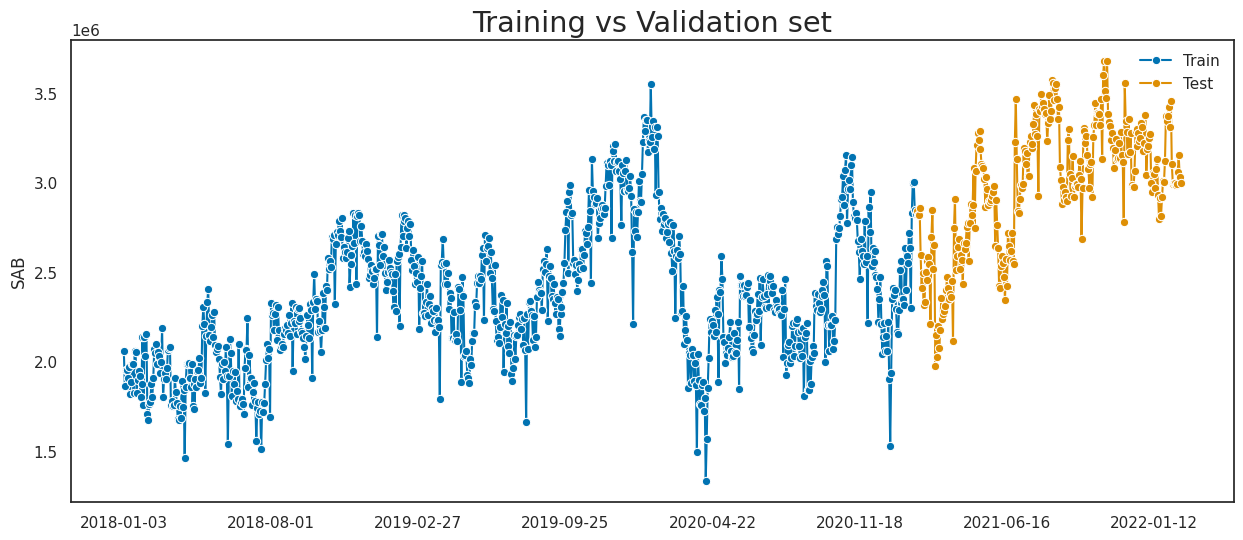

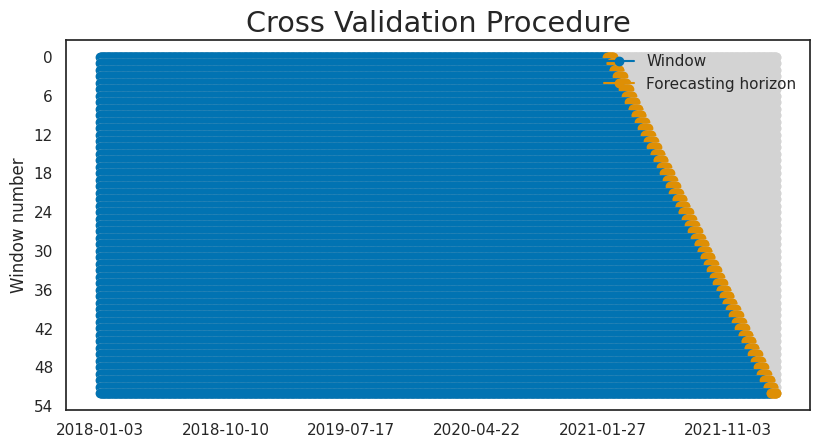

In [6]:
_ = model.split_procedure_summary()

model.plot_train_test(
    labels = ['Train', 'Test'],
    title='Training vs Validation set')

model.plot_cv_procedure(xlabel='')

### Out-Of-sample Evaluation

In [7]:
summary_horizon, summary_results = model.evaluate()


Start Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.082 minutes

Start Seasonal_Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/utils/seasonality.py:116: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  df.index = df.index.to_period(freq=freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/utils/seasonality.py:122: FutureWarning: PeriodDtype[B] is deprecated and will be removed in 

Evaluation completed in: 0.05 minutes

Start AutoARIMA forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/

Evaluation completed in: 0.678 minutes

Start AutoETS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 1.17 minutes

Start AutoCES forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 1.005 minutes

Start AutoTheta forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.793 minutes

Start AutoTBATS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated

Evaluation completed in: 0.436 minutes

Start LOESS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.171 minutes

Start Prophet forecaster evalution....


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plot

Evaluation completed in: 0.018 minutes


In [8]:
display(summary_results.T.sort_values('Avg MAPE'))
display(summary_horizon.T)

,Number of Folds,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg RMSE,Avg MAE,Avg MAPE,Avg R2,Avg MedianAE
AutoARIMA,53,29.723097,2.933587,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,229203.76918,198740.437975,0.067649,-3.582866,186965.619594
AutoETS,53,57.140059,0.907995,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,230112.717021,199578.876803,0.067844,-3.596628,188468.265861
AutoTheta,53,34.295504,0.348922,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,230057.769007,199538.972642,0.067864,-3.610207,188229.511792
AutoTBATS,53,15.6389,0.005528,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,240591.744008,208082.188134,0.070488,-4.03122,196886.737225
Naive,53,0.00534,0.068748,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,251095.772231,218947.666038,0.073843,-5.439758,207112.160377
AutoCES,53,52.638478,0.441481,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,258122.091785,222498.908801,0.076771,-5.155961,207102.950018
Seasonal_Naive,53,0.005264,0.064463,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,264362.937606,225281.662264,0.07773,-4.915143,206508.330189
LOESS,53,4.101438,0.161724,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,265751.701652,234098.997325,0.079781,-5.524728,225639.812735
Prophet,53,0.203064,0.046228,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,406353.952013,378574.679627,0.127127,-14.755643,371172.956824


horizon                             1              2              3   \
Naive          RMSE      211856.313601  253607.162089  237623.073328   
               MAE       149182.018868  175527.415094  179908.962264   
               MAPE           0.050071       0.057215       0.060512   
               R2             0.661804       0.452235       0.574895   
               MedianAE   93095.000000  110562.000000  112338.000000   
Seasonal_Naive RMSE      240744.101904  284883.070021  244235.938815   
               MAE       190389.811321  215295.415094  200378.452830   
               MAPE           0.065461       0.073548       0.069109   
               R2             0.563287       0.308799       0.550905   
               MedianAE  186633.000000  153486.000000  174456.000000   
AutoARIMA      RMSE      187471.946959  224239.092341  206214.618537   
               MAE       143712.561059  158230.400818  160482.798519   
               MAPE           0.048625       0.052631       0.054213   
               R2             0.735176       0.571754       0.679847   
               MedianAE  122916.667775  108415.608469  119598.067662   
AutoETS        RMSE      187671.681503  224888.727987  206668.983338   
               MAE       143884.734899  157990.285971  160609.950098   
               MAPE           0.048657       0.052556       0.054228   
               R2             0.734611       0.569269       0.678435   
               MedianAE  128082.670289  110875.417522  119783.670289   
AutoCES        RMSE      207912.957333  242289.930988  213950.181382   
               MAE       164171.787211  180154.024525  179673.775317   
               MAPE           0.056719       0.060989       0.061291   
               R2             0.674277       0.500033       0.655377   
               MedianAE  116220.859375  145497.968750  147333.000000   
AutoTheta      RMSE      187602.535703  224800.693216  206587.835769   
               MAE       143897.481132  157905.622642  160636.122642   
               MAPE           0.048668       0.052537       0.054250   
               R2             0.734807       0.569606       0.678687   
               MedianAE  129060.750000  110014.250000  120896.750000   
AutoTBATS      RMSE      190951.327973  228817.748828  211513.253530   
               MAE       147358.187741  163902.600785  165264.623542   
               MAPE           0.049737       0.054532       0.055766   
               R2             0.725254       0.554087       0.663183   
               MedianAE  136535.351197  115463.424844  139326.414898   
LOESS          RMSE      239494.943213  272890.353621  236643.497961   
               MAE       200387.471792  213686.031706  202498.195164   
               MAPE           0.067868       0.071773       0.068108   
               R2             0.567807       0.365769       0.578393   
               MedianAE  182751.709223  182234.415628  214839.049353   
Prophet        RMSE      380453.407522  412913.109236  393223.339874   
               MAE       336138.380768  361668.014547  348579.069972   
               MAPE           0.113370       0.121544       0.116887   
               R2            -0.090657      -0.452072      -0.164119   
               MedianAE  374224.306030  371582.083092  366030.072047   

horizon                             4              5              6   \
Naive          RMSE      243117.264690  285055.946401  291537.220597   
               MAE       199137.792453  238393.188679  245589.811321   
               MAPE           0.066763       0.080647       0.082762   
               R2             0.499913       0.422464       0.357564   
               MedianAE  161985.000000  217860.000000  228049.000000   
Seasonal_Naive RMSE      236349.244987  285055.946401  282596.608719   
               MAE       179367.264151  238393.188679  229115.452830   
               MAPE           0.062693       0.080647       0.079153   
               R2             0.527368 

In [9]:
rank, score = model.select_best(score = 'MAPE')
display(rank)
display(score)

horizon,1,2,3,4,5,6,7,8,9,10
Best_1,AutoARIMA,AutoTheta,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA
Best_2,AutoETS,AutoETS,AutoETS,AutoTheta,AutoETS,AutoTheta,AutoETS,AutoETS,AutoTheta,AutoETS
Best_3,AutoTheta,AutoARIMA,AutoTheta,AutoETS,AutoTheta,AutoETS,AutoTheta,AutoTheta,AutoETS,AutoTheta
Best_4,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,Seasonal_Naive,AutoTBATS,AutoTBATS,AutoTBATS,LOESS
Best_5,Naive,Naive,Naive,Seasonal_Naive,AutoCES,AutoTBATS,Naive,AutoCES,Naive,AutoTBATS
Best_6,AutoCES,AutoCES,AutoCES,Naive,LOESS,Naive,Seasonal_Naive,Naive,Seasonal_Naive,AutoCES
Best_7,Seasonal_Naive,LOESS,LOESS,LOESS,Naive,AutoCES,AutoCES,LOESS,LOESS,Naive
Best_8,LOESS,Seasonal_Naive,Seasonal_Naive,AutoCES,Seasonal_Naive,LOESS,LOESS,Seasonal_Naive,AutoCES,Seasonal_Naive
Best_9,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet,Prophet


,Naive,Seasonal_Naive,AutoARIMA,AutoETS,AutoCES,AutoTheta,AutoTBATS,LOESS,Prophet,Best Model (over all),Best Model (per horizon),Best 2 Models (over all),Best 2 Models (per horizon),Model Avg (all models)
horizon,,,,,,,,,,,,,,
1,0.050071,0.065461,0.048625,0.048657,0.056719,0.048668,0.049737,0.067868,0.113370,0.048625,0.048625,0.048641,0.048641,0.061019
2,0.057215,0.073548,0.052631,0.052556,0.060989,0.052537,0.054532,0.071773,0.121544,0.052631,0.052537,0.052594,0.052547,0.066369
3,0.060512,0.069109,0.054213,0.054228,0.061291,0.054250,0.055766,0.068108,0.116887,0.054213,0.054213,0.054221,0.054221,0.066041
4,0.066763,0.062693,0.057900,0.058001,0.073772,0.057987,0.061670,0.073431,0.118911,0.057900,0.057900,0.057951,0.057943,0.070125
5,0.080647,0.080647,0.074671,0.074924,0.076329,0.075044,0.076225,0.076617,0.119747,0.074671,0.074671,0.074798,0.074798,0.081650
6,0.082762,0.079153,0.076020,0.076472,0.088303,0.076433,0.079425,0.090757,0.133501,0.076020,0.076020,0.076246,0.076227,0.086981
7,0.083610,0.086737,0.076632,0.077201,0.087449,0.077228,0.081145,0.091624,0.140363,0.076632,0.076632,0.076916,0.076916,0.089110
8,0.082396,0.083173,0.077369,0.077370,0.081614,0.077479,0.080370,0.083111,0.134539,0.077369,0.077369,0.077369,0.077369,0.086380
9,0.083063,0.085387,0.076107,0.076653,0.091846,0.076573,0.080572,0.090010,0.134750,0.076107,0.076107,0.076380,0.076340,0.088329


<Axes: title={'center': 'Out of Sample Performance'}, xlabel='horizon', ylabel='MAPE'>

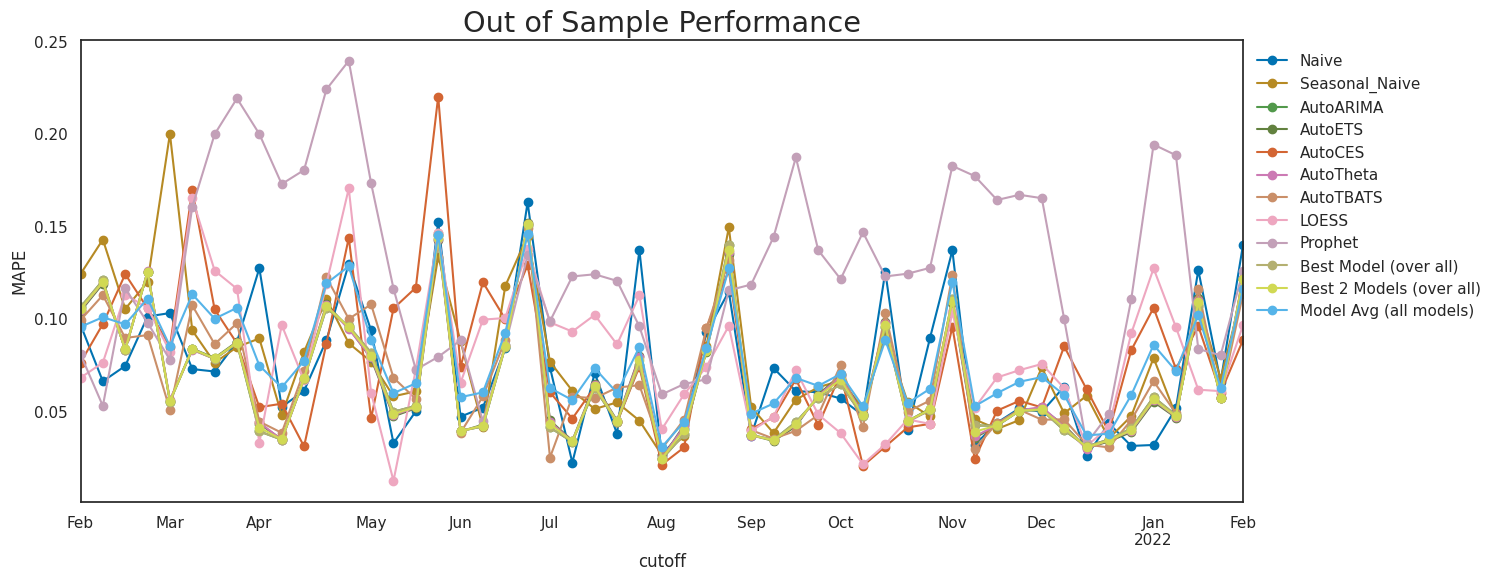

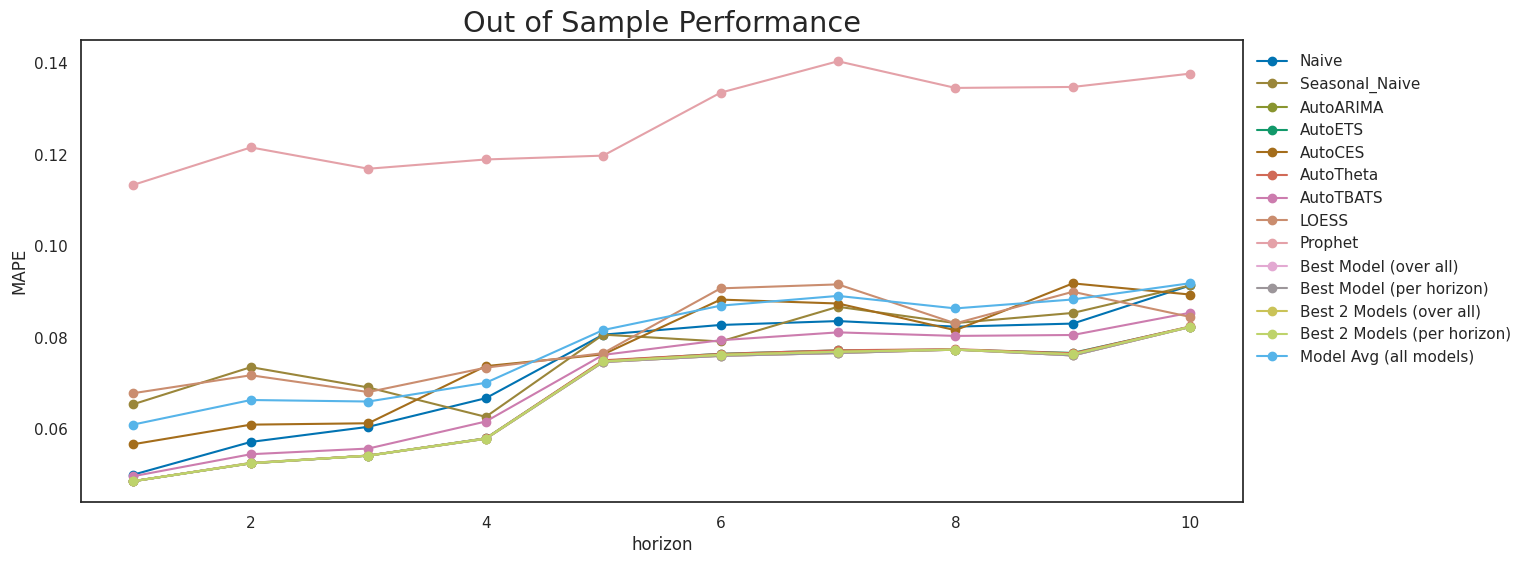

In [10]:
subset = ['AutoETS', 'AutoCES', 'AutoTBATS', 'Prophet','Model Avg (all models)']
model.plot_model_compare(score ='MAPE', view = 'cutoff')#, model_subset=subset)
model.plot_model_compare(score ='MAPE', view = 'horizon')#, model_subset=subset + ['Best Model (per horizon)'])

Fitting Naive ...
Fitting Seasonal_Naive ...
Fitting AutoARIMA ...
Fitting AutoETS ...
Fitting AutoCES ...
Fitting AutoTheta ...
Fitting AutoTBATS ...


10:08:07 - cmdstanpy - INFO - Chain [1] start processing


Fitting LOESS ...
Fitting Prophet ...


10:08:08 - cmdstanpy - INFO - Chain [1] done processing


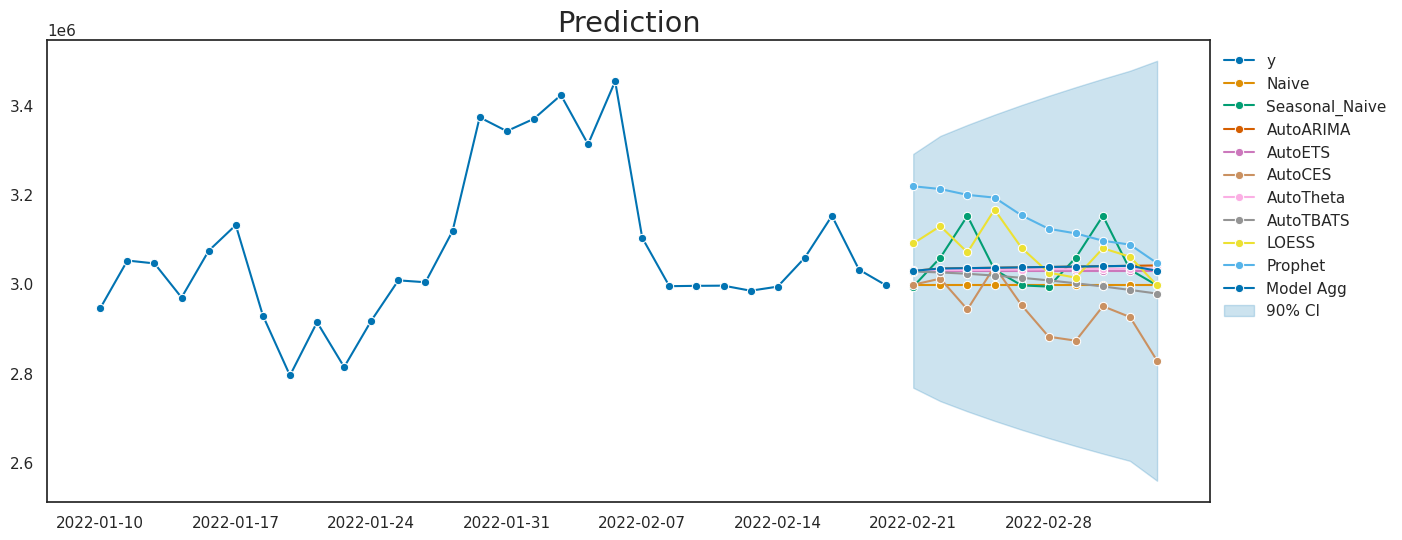

In [11]:
model.fit(verbose = True)
y_pred, y_pred_ints, preds, pred_ints = model.predict(mode='best_horizon', ret_underlying=True)
f, ax =model.plot_prediction(y_pred = y_pred,
                     models_preds = preds,
                     y_pred_interval = y_pred_ints)  

In [12]:
model.get_pred_errors()

,cutoff,horizon,error
0,2021-02-05,1,-10383.300244
1,2021-02-12,1,-317486.412873
2,2021-02-19,1,16765.877530
3,2021-02-26,1,312401.311794
4,2021-03-05,1,-170994.686765
...,...,...,...
525,2022-01-07,10,-312312.857628
526,2022-01-14,10,332714.840885
527,2022-01-21,10,591191.856317
528,2022-01-28,10,-221146.119098


In [13]:
path = '../model_output/SAB_forecast.pkl'
model.save(path)